<a href="https://colab.research.google.com/github/aamir-ansari-44/Study/blob/main/Adv.%20Supervised%20Learning/busin_case_stock_portfo_hierarchal_sidhu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import pandas as pd
  import numpy as np
  from matplotlib import pyplot as plt
  plt.rcParams["figure.figsize"] = (18,10)
  import seaborn as sns

In [ ]:
#### **Dataset - Top 50 NSE stocks**

# - Contains company's stock symbol
# - Name, Industry and other details

# google drive
# !wget "https://drive.google.com/uc?export=download&id=1giO5bbp3l0INVvTQIGJ7s_Ai5_TWNuIb" -O ind_nifty50list.csv

gist_url = "https://gist.github.com/singhsidhukuldeep/cff835eab5698167230e67107786cde6/raw/9fc3e078271cf1eb3d0219adf17378289efa8529/ind_nifty50list.csv"

In [ ]:
!pip install yfinance
# yfinance is a library that helps us download market data from yahoo finance's api.
# https://pypi.org/project/yfinance/

In [ ]:
# Since yfinance is an old library, it also has some glitches, so we install this library as a fix
!pip install fix-yahoo-finance

  Preparing metadata (setup.py) ... done
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.37-py3-none-any.whl size=7073 sha256=63802ff5bcee34774bf9926a5fc16aedef5f98a6347fd234a4a0204eead5e47f
  Stored in directory: /root/.cache/pip/wheels/1e/5e/ca/d9dbe97f5c895289286a5f99311e9e9633c9898f35d42802ca
Successfully built fix-yahoo-finance


In [ ]:
stocks_df = pd.read_csv(gist_url)
# Getting list of Company names which are stored in the 'Symbol' column of the data
list_of_symbols = list(stocks_df['Symbol'])
stocks_df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finance Ltd.,FINANCIAL SERVICES,BAJFINANCE,EQ,INE296A01024


In [ ]:
# We'll add .NS at the end of every symbol to fetch data from Yahoo Finance based on company's symbol.
yf_symbols = list(map(lambda x: x + '.NS', list_of_symbols))
yf_symbols

['ADANIPORTS.NS',
 'ASIANPAINT.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BAJAJFINSV.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'BRITANNIA.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DIVISLAB.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GRASIM.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HDFCLIFE.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ICICIBANK.NS',
 'ITC.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'JSWSTEEL.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'NESTLEIND.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBILIFE.NS',
 'SHREECEM.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATACONSUM.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'TITAN.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'WIPRO.NS']

In [ ]:
%%time
import yfinance as yf


stock_financials = {
    'marketCap': [],
    'regularMarketVolume': [],
    'earningsQuarterlyGrowth': [],
    'bookValue': [],
    'totalRevenue': [],
    'returnOnAssets': [],
    'profitMargins': [],
    'earningsGrowth': []
    }

for ticker in yf_symbols:
    stock_info = yf.Ticker(ticker).info
    for variable in stock_financials:
        stock_financials[variable].append(stock_info.get(variable))
    # stock_financials['marketCap'].append(stock_info['marketCap'])
    # stock_financials['regularMarketVolume'].append(stock_info['regularMarketVolume'])
    # stock_financials['earningsQuarterlyGrowth'].append(stock_info['earningsQuarterlyGrowth'])
    # stock_financials['bookValue'].append(stock_info['bookValue'])
    # stock_financials['totalRevenue'].append(stock_info['totalRevenue'])
    # stock_financials['returnOnAssets'].append(stock_info['returnOnAssets'])
    # stock_financials['profitMargins'].append(stock_info['profitMargins'])
    # stock_financials['earningsGrowth'].append(stock_info['earningsGrowth'])

CPU times: user 12.7 s, sys: 213 ms, total: 13 s
Wall time: 21.4 s


In [ ]:
df = pd.DataFrame(stock_financials)
print(df.shape)
print(df.info())
df.head()

(50, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   marketCap                50 non-null     int64  
 1   regularMarketVolume      50 non-null     int64  
 2   earningsQuarterlyGrowth  47 non-null     float64
 3   bookValue                49 non-null     float64
 4   totalRevenue             50 non-null     int64  
 5   returnOnAssets           13 non-null     float64
 6   profitMargins            50 non-null     float64
 7   earningsGrowth           47 non-null     float64
dtypes: float64(5), int64(3)
memory usage: 3.2 KB
None


,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth
0,1730484371456,12521444,0.972,210.251,220413706240,NaN,0.28431,0.927
1,3103914721280,696071,0.525,166.725,350034591744,NaN,0.13255,0.525
2,3026823151616,6725424,0.391,442.406,565070594048,0.01008,0.22173,0.384
3,1313148108800,327982,0.413,1037.667,396634685440,NaN,0.16491,0.445
4,4405182595072,581195,0.324,899.572,272220405760,NaN,0.45361,0.323


In [ ]:
%%time
import yfinance as yf
# Getting returns of the stocks
stock_prices = yf.download(yf_symbols, start='2020-01-01', end='2021-01-01')['Adj Close']
stock_prices.columns = list_of_symbols
print(stock_prices.shape)
# print(stock_prices.info())
stock_prices.tail()

[*********************100%%**********************]  50 of 50 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDFC.NS']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2020-01-01 -> 2021-01-01)')



(251, 50)
CPU times: user 16.7 s, sys: 650 ms, total: 17.4 s
Wall time: 22.5 s


,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-24 00:00:00,468.799652,2595.956787,608.021667,2956.136719,897.769348,5113.761719,512.656006,315.848083,3374.417480,811.275696,...,571.007019,586.310059,175.403320,26.201509,2754.679443,840.134033,1477.213745,4968.887695,430.813141,376.651733
2020-12-28 00:00:00,473.697754,2630.902832,615.445129,2991.131104,898.018860,5132.698242,516.917358,320.198273,3360.708008,808.305969,...,567.622314,587.724609,185.771011,26.637289,2773.663818,840.000977,1524.268555,5064.822754,434.647705,377.341553
2020-12-29 00:00:00,473.550842,2643.548340,627.950317,3005.891113,896.122131,5129.147949,515.579529,319.152527,3351.148926,806.163818,...,571.151978,583.968750,182.880020,26.618343,2774.705566,856.453308,1520.861694,5069.353516,435.893951,379.411072
2020-12-30 00:00:00,475.510071,2680.405762,622.868469,3020.431885,894.689453,5260.963867,511.516388,320.281921,3342.382324,802.123047,...,564.769287,579.822571,183.577835,26.965702,2754.632568,872.063110,1533.205322,5274.226074,447.781067,378.819794
2020-12-31 00:00:00,473.893707,2709.911377,618.235168,3016.840576,889.163696,5222.548340,505.124298,318.817902,3335.341064,798.374268,...,572.844360,575.481445,183.278778,27.100433,2710.557373,863.149536,1547.573608,5208.626953,447.062103,380.642944


In [ ]:
stock_prices.index.max(), stock_prices.index.min()

(Timestamp('2020-12-31 00:00:00'), Timestamp('2020-01-01 00:00:00'))

In [ ]:

# to see % growth of the stock: ((endDate/startDate) - 1) * 100
stock_prices.loc['returns_2020'] = (stock_prices.loc[stock_prices.index.max()] / stock_prices.loc[stock_prices.index.min()] - 1)*100

stock_prices.tail()

,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJFINANCE,BAJAJFINSV,BPCL,BHARTIARTL,BRITANNIA,CIPLA,...,SUNPHARMA,TCS,TATACONSUM,TATAMOTORS,TATASTEEL,TECHM,TITAN,UPL,ULTRACEMCO,WIPRO
Date,,,,,,,,,,,,,,,,,,,,,
2020-12-28 00:00:00,473.697754,2630.902832,615.445129,2991.131104,898.018860,5132.698242,516.917358,320.198273,3360.708008,808.305969,...,567.622314,587.724609,185.771011,26.637289,2773.663818,840.000977,1524.268555,5064.822754,434.647705,377.341553
2020-12-29 00:00:00,473.550842,2643.548340,627.950317,3005.891113,896.122131,5129.147949,515.579529,319.152527,3351.148926,806.163818,...,571.151978,583.968750,182.880020,26.618343,2774.705566,856.453308,1520.861694,5069.353516,435.893951,379.411072
2020-12-30 00:00:00,475.510071,2680.405762,622.868469,3020.431885,894.689453,5260.963867,511.516388,320.281921,3342.382324,802.123047,...,564.769287,579.822571,183.577835,26.965702,2754.632568,872.063110,1533.205322,5274.226074,447.781067,378.819794
2020-12-31 00:00:00,473.893707,2709.911377,618.235168,3016.840576,889.163696,5222.548340,505.124298,318.817902,3335.341064,798.374268,...,572.844360,575.481445,183.278778,27.100433,2710.557373,863.149536,1547.573608,5208.626953,447.062103,380.642944
returns_2020,29.510450,55.158673,-17.129691,14.241175,-4.980575,25.431211,12.838416,-18.241302,21.549141,72.742102,...,37.638219,83.492700,-0.325288,41.172291,34.600461,32.974437,36.743419,30.499932,-19.759890,56.564144


In [ ]:
stock_prices = stock_prices.transpose()
stock_prices.head()

Date,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,2020-01-09 00:00:00,2020-01-10 00:00:00,2020-01-13 00:00:00,2020-01-14 00:00:00,...,2020-12-18 00:00:00,2020-12-21 00:00:00,2020-12-22 00:00:00,2020-12-23 00:00:00,2020-12-24 00:00:00,2020-12-28 00:00:00,2020-12-29 00:00:00,2020-12-30 00:00:00,2020-12-31 00:00:00,returns_2020
ADANIPORTS,365.911560,371.240601,370.610779,368.382294,372.839294,373.662872,379.621704,379.863953,378.216797,377.102539,...,453.860352,435.198517,459.101349,461.158569,468.799652,473.697754,473.550842,475.510071,473.893707,29.510450
ASIANPAINT,1746.541992,1744.058350,1705.829834,1662.730957,1679.532104,1683.817749,1726.429321,1745.909180,1757.937744,1771.816895,...,2550.129639,2504.205078,2549.444092,2590.369385,2595.956787,2630.902832,2643.548340,2680.405762,2709.911377,55.158673
AXISBANK,746.027344,754.247864,740.297852,720.668152,723.159241,721.913696,740.198181,737.408203,734.767639,745.230164,...,607.324219,580.420593,587.644775,590.335083,608.021667,615.445129,627.950317,622.868469,618.235168,-17.129691
BAJAJ-AUTO,2640.764648,2616.369629,2575.334473,2546.496338,2546.748047,2564.604004,2586.777344,2599.771240,2593.777344,2600.106445,...,2932.310791,2836.568604,2860.263184,2899.111816,2956.136719,2991.131104,3005.891113,3020.431885,3016.840576,14.241175
BAJFINANCE,935.770447,948.457336,932.517700,902.269714,907.552979,912.527039,937.446777,935.151855,943.433472,953.371460,...,920.037537,883.213440,892.408264,899.835999,897.769348,898.018860,896.122131,894.689453,889.163696,-4.980575


In [ ]:
# Putting the data together
prices = stock_prices.iloc[:, -1]
df.index = stock_prices.index
df['return_2020'] = prices
df.head()

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,1730484371456,12521444,0.972,210.251,220413706240,NaN,0.28431,0.927,29.510450
ASIANPAINT,3103914721280,696071,0.525,166.725,350034591744,NaN,0.13255,0.525,55.158673
AXISBANK,3026823151616,6725424,0.391,442.406,565070594048,0.01008,0.22173,0.384,-17.129691
BAJAJ-AUTO,1313148108800,327982,0.413,1037.667,396634685440,NaN,0.16491,0.445,14.241175
BAJFINANCE,4405182595072,581195,0.324,899.572,272220405760,NaN,0.45361,0.323,-4.980575


In [ ]:
# nulls?
df.isna().sum()

marketCap                   0
regularMarketVolume         0
earningsQuarterlyGrowth     3
bookValue                   1
totalRevenue                0
returnOnAssets             37
profitMargins               0
earningsGrowth              3
return_2020                 1
dtype: int64

In [ ]:
df['returnOnAssets'] = df['returnOnAssets'].replace(np.nan, 0)
df.dropna(axis=0, inplace=True)
print(df.shape)
print(df.isna().sum())
df.head(3)

(45, 9)
marketCap                  0
regularMarketVolume        0
earningsQuarterlyGrowth    0
bookValue                  0
totalRevenue               0
returnOnAssets             0
profitMargins              0
earningsGrowth             0
return_2020                0
dtype: int64


,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,1730484371456,12521444,0.972,210.251,220413706240,0.00000,0.28431,0.927,29.510450
ASIANPAINT,3103914721280,696071,0.525,166.725,350034591744,0.00000,0.13255,0.525,55.158673
AXISBANK,3026823151616,6725424,0.391,442.406,565070594048,0.01008,0.22173,0.384,-17.129691


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [ ]:
scaled_df = pd.DataFrame(X, columns=df.columns, index=df.index)
scaled_df.head(3)

,marketCap,regularMarketVolume,earningsQuarterlyGrowth,bookValue,totalRevenue,returnOnAssets,profitMargins,earningsGrowth,return_2020
ADANIPORTS,-0.440747,0.467094,1.402555,-0.436109,-0.576777,-0.391162,1.374430,1.317802,0.316521
ASIANPAINT,0.021995,-0.497859,0.534241,-0.487908,-0.493051,-0.391162,-0.160617,0.540527,1.112162
AXISBANK,-0.003979,-0.005862,0.273941,-0.159831,-0.354153,-0.222180,0.741436,0.267900,-1.130316


In [ ]:
import scipy.cluster.hierarchy as sch
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage
Z = sch.linkage(scaled_df,method="ward")

Text(0, 0.5, 'distance')

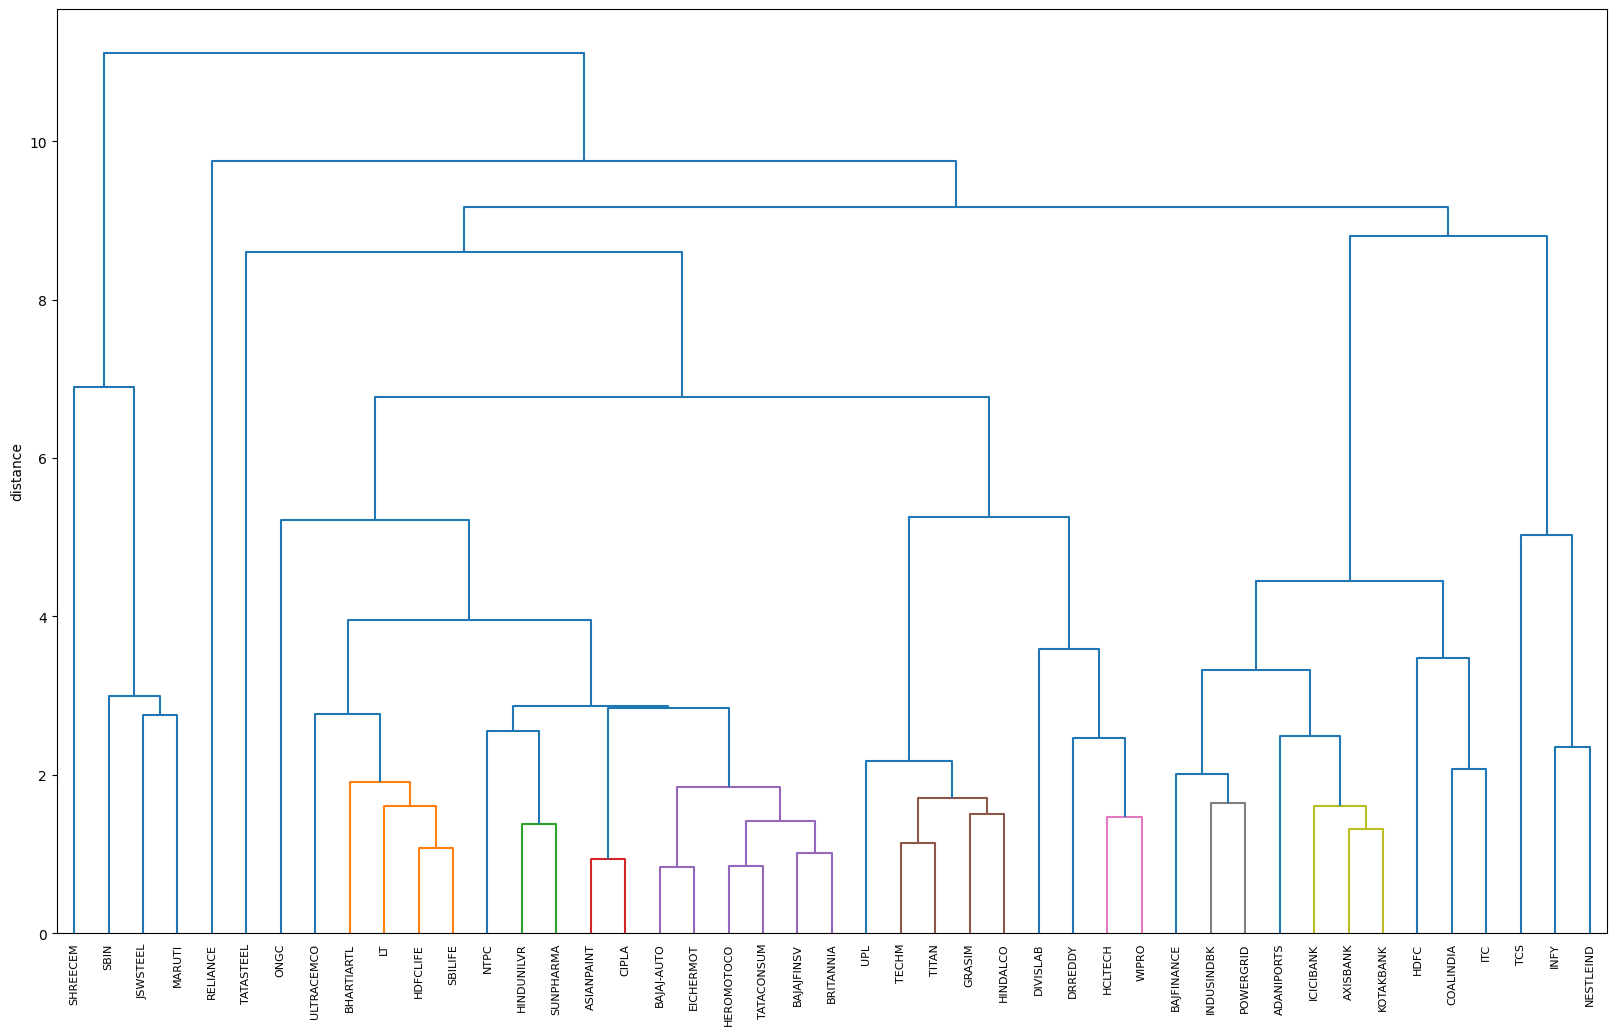

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=scaled_df.index, ax=ax, color_threshold=2)
plt.xticks(rotation=90)
ax.set_ylabel('distance')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
hc = AgglomerativeClustering(distance_threshold=6,n_clusters =None, affinity = 'euclidean', linkage = 'ward')
y_pred = hc.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
pd.DataFrame(y_pred,columns=["label"]).value_counts()

label
1        17
4        10
0         9
3         3
7         3
2         1
5         1
6         1
dtype: int64

Demo: https://live.yworks.com/demos/analysis/clustering/

![](https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/015/038/original/hierarch.gif?1663699414)

<img src="https://drive.google.com/uc?export=view&id=1s6BqKsj8G0N0GJYM3MGPvCuXysCC1heN">